In [25]:
# Author: Davide Aloi - PhD student - University of Birmingham
# Description: the script loads the results from wp_all_8_current_density_metrics, which are 3
# .csv files, and correlates current density metrics with DCM values resulting from the pairwise interactions
# Anodal vs sham (wp1a and wp2a (day1 and 5, separately)) and cathodal vs sham (wp1b). For wp2a this is done for both day 1 and day 5.

# The analysis method used is Canonical correlation analysis (CCA)

# Imports
import warnings
warnings.filterwarnings("ignore")
import os
import numpy as np
import pandas as pd
import scipy.stats

In [26]:
## Parameters and variables: 
results_folder = 'D:\\roast-chapter3\\wp_all_results\\' # Folder with results (current density)
main_folder = 'C:\\Users\\davide\\Documents\\GitHub\\wp1_2_roast\\' # Project folder
dcm_results_folder = 'C:\\Users\\davide\\Documents\\GitHub\\wp1_2_roast\\all_dcm_results\\' # Folder with dcm results

# Datasets names
db_names = ['wp2a_day1_pairwise','wp2a_day5_pairwise', 'wp1a_pairwise', 'wp1b_pairwise']
#db_names = ['wp2a_day5_pairwise']

In [27]:
# plot styles
import matplotlib.pyplot as plt
import seaborn as sns
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline


-------- CCA analysis for dataset wp2a_day1_pairwise ---------

Current density metrics
   m1_medians    m1_max  th_medians    th_max
0    0.969544  0.962761   -0.759147  1.993892
1    0.494771  1.090341   -1.273132 -1.232096
2   -0.188801 -0.037892   -0.369925  0.050379
3   -0.848727 -0.446289    0.629872 -0.768957
4    1.333970 -0.553655    1.669201 -0.414493

DCM values
       m1m1      thth      m1th      thm1
0  0.376178 -0.873285  1.078417 -1.326165
1  1.012793 -1.037412  1.257340 -0.012598
2  1.855143  0.856290 -0.074034 -0.334587
3 -0.805178 -0.617726 -0.856056 -0.761068
4 -0.949738 -0.009804 -0.218229  1.095352

P-value calculated with simple permutation (n = 1000) (first CV pair): r=0.7862883404622757, p=0.107
r histogram


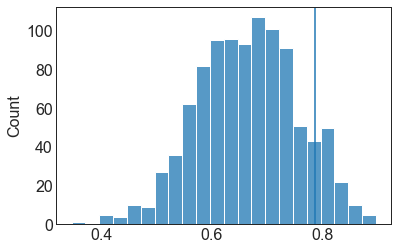


-------- CCA analysis for dataset wp2a_day5_pairwise ---------

Current density metrics
   m1_medians    m1_max  th_medians    th_max
0    0.969544  0.962761   -0.759147  1.993892
1    0.494771  1.090341   -1.273132 -1.232096
2   -0.188801 -0.037892   -0.369925  0.050379
3   -0.848727 -0.446289    0.629872 -0.768957
4    1.333970 -0.553655    1.669201 -0.414493

DCM values
       m1m1      thth      m1th      thm1
0  0.286798  0.175457 -1.194537 -0.518891
1 -1.598488 -0.228740 -0.989486 -0.287970
2 -1.535231  0.329641 -0.033057 -0.345846
3  0.068649  0.765347 -0.854723  0.437727
4 -0.405934 -1.283961 -1.432480 -1.520257

P-value calculated with simple permutation (n = 1000) (first CV pair): r=0.8243488528601683, p=0.053
r histogram


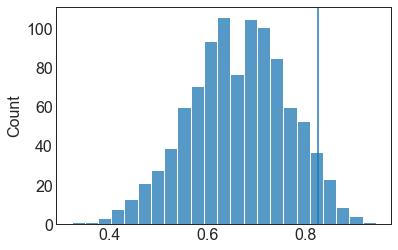


-------- CCA analysis for dataset wp1a_pairwise ---------

Current density metrics
   m1_medians    m1_max  th_medians    th_max
0    0.945318 -0.490045   -0.327461 -0.020904
1   -0.103840  1.003548    0.001019 -1.029639
2    0.795139 -1.602621    1.064717 -0.131722
3   -1.460198 -0.271293   -0.350375 -1.185532
4   -2.903509 -1.215809   -2.480561 -1.135783

DCM values
       m1m1      thth      m1th      thm1
0 -0.079439  1.200237 -0.053871 -2.316689
1  0.341490  0.017489 -0.558102  0.456105
2  1.398325  1.605080  1.745819  0.887893
3  0.674432 -0.597078  0.059891  0.422340
4 -0.326583 -0.827997  1.349797  1.643968

P-value calculated with simple permutation (n = 1000) (first CV pair): r=0.7253901398874152, p=0.333
r histogram


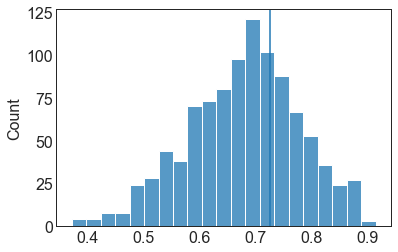


-------- CCA analysis for dataset wp1b_pairwise ---------

Current density metrics
   m1_medians    m1_max  th_medians    th_max  cb_medians    cb_max
0   -1.690701 -1.173951   -1.289101 -1.011208    0.355568  1.366619
1    0.021136  0.131219    1.282633  1.338009    1.449761 -0.278499
2    1.426351  0.924332    1.108416  0.919631    1.140971 -1.277144
3    0.841488  2.892845    1.317019 -0.401356    0.974236 -0.481487
4   -1.045955 -0.315438    0.015658 -0.917464   -0.259214  0.927924

DCM values
       m1m1      thth      m1th      thm1
0 -0.540638 -0.243918  1.221662  2.347108
1 -0.327180  0.614062  0.367428 -0.825141
2 -1.225913 -0.861842 -1.296179  0.200949
3  0.061382  1.745355 -0.128101  0.038500
4 -0.127455  0.527162  0.693799 -0.198187

P-value calculated with simple permutation (n = 1000) (first CV pair): r=0.7650126755046982, p=0.92
r histogram


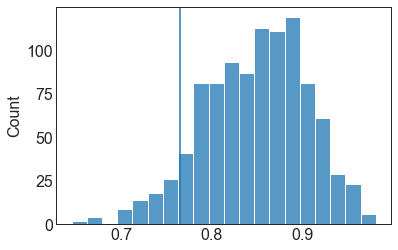

In [34]:
from sklearn.cross_decomposition import CCA

for db_id, db in enumerate(db_names):
    print('\n-------- CCA analysis for dataset ' + db + ' ---------\n')

    # Loading DCM results (nb: the unthresholded ones, for the correlation analysis)
    DCM = np.load(os.path.join(dcm_results_folder, db + '_dcm_unthresholded.npy'))

    # I'll do the DCM sham analysis in another script
    #DCM_sham = np.load(os.path.join(dcm_results_folder, db + '_dcm_sham_unthresholded.npy'))

    # Conversion of diagonal values to Hz + recentering on 0
    funcHz = lambda x: (-0.5*(np.exp(x))) if x != 0 else 0
    # Positive values now indicate less self inhibition
    # Negative values indicate more self inhibition

    for i in range(0, DCM.shape[0]): 
        diag = np.diagonal(DCM[i,:,:])
        diag_converted = []
        for element in diag:
            diag_converted.append(funcHz(element))
        np.fill_diagonal(DCM[i,:,:], np.array(diag_converted))

    # Loading current density results
    cd_metrics = pd.read_csv(os.path.join(results_folder, db +'_current_density_results.csv'))
    cd_metrics.drop('Unnamed: 0', axis = 1, inplace = True) # Dropping participants' id

    # for wp1a and wp2a (stimulatio over M1) I'm not interested in CB values
    if (db == 'wp2a_day1_pairwise') or (db == 'wp2a_day5_pairwise') or (db == 'wp1a_pairwise'):
        cd_metrics.drop(['cb_medians','cb_max'], axis = 1, inplace = True)


    # Extracting DCM values I am interested in (m1<->m1, th<->th, m1->th, th->m1)
    dcm_df = pd.DataFrame(zip(DCM[:,0,0], DCM[:,1,1], DCM[:,1,0], DCM[:,0,1]),
                                columns = ['m1m1', 'thth', 'm1th',
                                'thm1'])

    # We first standardise our variables by subtracting with mean and dividing by standard deviation
    cd_df_s = (cd_metrics-cd_metrics.mean())/(cd_metrics.std())
    dcm_df_s = (dcm_df-dcm_df.mean())/(dcm_df.std())

    print('Current density metrics')
    print(cd_df_s.head())
    print('\nDCM values')
    print(dcm_df_s.head())

    ''' Damian: Basically your CCA analysis will give you pairs of canonical variates (one of
    each pair that describes the current measures, and one that describes the DCM). For each
    significant pair, you then correlate the CV from one side with each of the individual
    measures from the other side.
    This will basically tell you that e.g., Current density overall is most strongly related to
    DCM connectivity in pathways X and Y, and that DCM connectivity overall is most strongly
    related to current density in region A and B. '''

    ## CCA METHOD 1, simple p value
    # CCA using scikit-learn (X = current measures, Y = DCM measures)
    cca = CCA(n_components = 4)
    cca.fit(cd_df_s, dcm_df_s)
    X_c, Y_c = cca.transform(cd_df_s, dcm_df_s)    

    # Dataframe containing Canonical Variates (CV) (only the first 2 CVs for variable dataset)
    cc_res = pd.DataFrame({"CCX_1":X_c[:, 0],
                           "CCY_1":Y_c[:, 0],
                           "CCX_2":X_c[:, 1],
                           "CCY_2":Y_c[:, 1]})


    # NB you can see various approach here, they all lead to the same result but different
    # p values. I'll use the P value calculated with the third approach (permutation)
    # Correlation between FIRST pair of canonical variates 
    r1, p1  = scipy.stats.pearsonr(X_c[:, 0], Y_c[:, 0])

    #print(f'\n1st Approach: Correlation between first pair of CVs (scikit-learn): {r1}, p = {p1}\n')
    # cca_permcca[2][0] below should be equal to the r1 above

    #print('Correlations between all CV pairs (scikit-learn).')
    #for i in range(0,len(X_c[0,:])):
    #    this_CV_r, this_CV_p = scipy.stats.pearsonr(X_c[:, i], Y_c[:, i])
    #    print('r=' + str(round(this_CV_r,3)) + ', p=' +  str(round(this_CV_p,5)))
    #
    #print('\n')

    ## CCA method 2: permcca from 
    ## https://www.sciencedirect.com/science/article/pii/S1053811920305516?via%3Dihub
    from custom_functions import permcca
    # cross checking results using _cca from permcca
    #cca_permcca = permcca._cca(cd_df_s,dcm_df_s, r = 0, s = 0)
    #permcca_results = permcca.permcca(cd_df_s, dcm_df_s)

    #print('2nd Approach from https://www.sciencedirect.com/science/article/pii/S1053811920305516?via%3Dihub')
    #print('Correlations between canonical variates calculated with permcca (only showing 1st pair): ' + str(round(cca_permcca[2][0],4)))
    #print('P-value for canonical modes (FWER corrected via closure): ' +str(round(permcca_results[0],4)))


    ## CCA  method 3: Simple permutation (approach used!!)
    from tqdm import tqdm
    rs = []
    n = 1000 # number of permutations

    # Copying the current density and DCM datasets
    cd_df_s_perm = cd_df_s.copy()
    dcm_df_s_perm = cd_df_s.copy()

    for i in range(0,n):
        # Shuffling rows
        cd_df_s_perm = cd_df_s_perm.sample(frac=1).reset_index(drop=True) #cv dataset
        dcm_df_s_perm = dcm_df_s_perm.sample(frac=1).reset_index(drop=True) #dcm dataset
        # running cca 
        this_cca = permcca._cca(cd_df_s_perm, dcm_df_s_perm, r = 0, s = 0)
        # appending result (r of first two CVs)
        rs.append(this_cca[2][0]) # r associated to first pair of CV

    # calculating p value associated with permutation (proportion of Rs > r1 out of n)
    p_rs = ((np.asarray(rs)> r1).sum())/n

    print('\nP-value calculated with simple permutation (n = ' + str(n) + ') (first CV pair): r=' + str(r1) + ', p=' + str(p_rs))
    print('r histogram')
    import seaborn as sns

    sns.histplot(data=rs)
    plt.axvline(r1)
    plt.show()
    

    # IF p_rs IS SIGNIFICANT, I RUN AND PLOT THE CROSS LOADING AND CANONICAL LOADINGS
    if p_rs < 0.05:
        print( '\n----' + ' CCA analysis db: '+ db + ' ----')
        ### PLOT 1) Ploting correlation between 1st pair of CVs
        from numpy.polynomial.polynomial import polyfit
        x, y = X_c[:,0], Y_c[:,0]
        b, m = polyfit(x, y, 1)
        plt.rcParams['font.family'] = 'sans-serif'
        plt.rcParams['figure.facecolor'] = 'white'
        plt.scatter(x, y, edgecolors= "black")
        plt.xlabel('Current density canonical variate')
        plt.ylabel('DCM canonical variate')
        plt.plot(x, b + m * x, '--',color='black', linewidth=0.8, alpha = 0.7)
        plt.tick_params(axis='both', which='major', labelsize=20)

        text = 'r = ' + str(round(r1, 5)) + ' \np = ' + str(p_rs)
        if p_rs < 0.001:
            text = 'r = ' + str(round(r1, 3)) + ' \np < 0.001' 

        #plt.text(np.min(x)+0.5, np.max(y)-0.5, text , horizontalalignment='center',
        #                    verticalalignment='center', fontsize = 10)
        plt.savefig(db + '_cor_CCA_pairwiseint.png', dpi=300)
        plt.show()
        ###

        ## CCA correlations
        # NB: X_c = canonical variate for the current density (first cv)
        # Y_c = canonical variate for the DCM (first cv)
        # Correlation of DCM values with first current density CV (X_c[:,0])
        # these are also named "cross-loadings"

        r_list_dcm = [] # list of R for the dcm values
        p_list_dcm = [] # list of p values

        print('\nCROSS-LOADINGS:')
        print('Correlations between first current density variate and DCM measures')
        for DCM_measure in dcm_df_s:
            r, p = scipy.stats.pearsonr(X_c[:, 0], dcm_df_s[DCM_measure])
            print(DCM_measure +': r=' + str(round(r,3)) + ', p=' +  str(round(p,5)))
            r_list_dcm.append(r)
            p_list_dcm.append(p)

        # Correlation of Current density values with first DCM covariate (Y_c[:,0])
        r_list_cd = [] # list of R for the current density values
        p_list_cd = [] # list of p values

        print('\n Correlations between first DCM variate and current density measures')
        for CD_measure in cd_df_s:
            r, p = scipy.stats.pearsonr(Y_c[:, 0], cd_df_s[CD_measure])
            print(CD_measure +': r=' + str(round(r,3)) + ', p=' +  str(round(p,5)))
            r_list_cd.append(r)
            p_list_cd.append(p)

        # UPDATE 06/09/2022
        # I am adding the calculation of the canonical loadings as well (correlatin between each 
        # feature in a variable set and the canonical variate for the same variable set)
        # same code as above, but Y_c and X_c are now switched
        r_list_dcm2 = [] # list of R for the dcm values
        p_list_dcm2 = [] # list of p values
        print('\nCANONICAL LOADINGS:')    
        print('Correlations between first current density variate and current density measures')
        for DCM_measure in dcm_df_s:
            r, p = scipy.stats.pearsonr(Y_c[:, 0], dcm_df_s[DCM_measure])
            print(DCM_measure +': r=' + str(round(r,3)) + ', p=' +  str(round(p,5)))
            r_list_dcm2.append(r)
            p_list_dcm2.append(p)

        # Correlation of Current density values with first DCM covariate (Y_c[:,0])
        r_list_cd2 = [] # list of R for the current density values
        p_list_cd2 = [] # list of p values

        print('\n Correlations between first DCM variate and DCM measures')
        for CD_measure in cd_df_s:
            r, p = scipy.stats.pearsonr(X_c[:, 0], cd_df_s[CD_measure])
            print(CD_measure +': r=' + str(round(r,3)) + ', p=' +  str(round(p,5)))
            r_list_cd2.append(r)
            p_list_cd2.append(p)


        ## Storing R and P values in 2 dataframes, one for the DCM metrics and one for the 
        # current density metrics. These will be used for plotting results.
        df_dcm_res = pd.DataFrame({"measure": dcm_df_s.columns,
                                "r": r_list_dcm,
                            "p":p_list_dcm})

        df_cd_res = pd.DataFrame({"measure": cd_df_s.columns,
                                "r": r_list_cd,
                            "p":p_list_cd})
        
        ### PLOT 2) Plotting scatterplots with R values as in:
        # https://www.sciencedirect.com/science/article/pii/S2213158220302096
        # Red dots: significant correlations. Grey dots: p<0.05
        # values are ordered on the y axis based on their p-value (higher R: higher Y)

        plot_this_stuff = 0
        # Excluding these two plots for now 
        
        results = [df_dcm_res, df_cd_res]

        for result in results:
            df_cor = result
            # Ordering measures based on their P-values           
            df_cor = df_cor.sort_values(by=['r'], key = abs, ascending = False).reset_index(drop=True)
            df_cor['rank'] = np.flip(df_cor.index.values)
            df_cor['sig'] =  np.where(df_cor['p'] < 0.05, 'sig', 'not-sig')
            df_cor['col'] = np.where(df_cor['p'] < 0.05, 'red', 'gray')
            if plot_this_stuff == 1:
                ax = sns.scatterplot('r', # Horizontal axis
                        'rank', # Vertical axis
                        data = df_cor, # Data source
                        size = 10,
                        hue = 'col',
                        edgecolor="black",
                        palette = list(dict.fromkeys(df_cor.col)),
                        legend = False) 

                ax.set_xticks(np.arange(-1,1,0.2)) # increasing n of x-ticks
                ax.set_xlabel("Pearson's r")
                plt.rcParams['figure.facecolor'] = 'white'
                plt.rcParams['font.family'] = 'sans-serif'
                plt.xlim(-0.7,0.85)
                sns.despine(left=True)
                plt.gca().axes.get_yaxis().set_visible(False)
                plt.axvline(x=0, color='k', linestyle='--', alpha = 0.4, linewidth = 1)

                # Plotting measures' names
                for i, measure in enumerate (df_cor.measure):
                    off_x = 0.05
                    al = 'left'
                    if df_cor.r[i] < 0:
                        off_x = -0.05
                        al = 'right' 
                    plt.text(df_cor.r[i]+off_x, df_cor['rank'].values[i]+0.01, measure, fontdict={'size': 12, 'ha': al})
            plt.show()

        ## PLOT 3) Results combined
        print('Results combined into single Hlines plot')
        results[0]['measure_group'] = 'DCM'
        results[1]['measure_group'] = 'CD'
        results[0] = results[0].sort_values(by=['r'], key = abs, ascending = False).reset_index(drop=True)
        results[1] = results[1].sort_values(by=['r'], key = abs, ascending = False).reset_index(drop=True)
        results[0]['col'] = np.where(results[0]['p'] < 0.05, 'tab:green', 'gray')
        results[1]['col'] = np.where(results[1]['p'] < 0.05, 'tab:blue', 'gray')
        results[0]['rank'] = np.flip(results[0].index.values)
        results[1]['rank'] = np.flip(results[1].index.values) + results[0].shape[0]
        
        # Renaming some rows for clearer labels!
        results[1]['measure'] = results[1]['measure'].str.replace('_medians',' Med')
        results[1]['measure'] = results[1]['measure'].str.replace('_max',' Max')
        results[1]['measure'] = results[1]['measure'].str.replace('cb','Cereb.')
        results[1]['measure'] = results[1]['measure'].str.replace('m1','M1')
        results[1]['measure'] = results[1]['measure'].str.replace('th','Thalamus')
        
        results[0]['measure'] = results[0]['measure'].str.replace('m1m1','M1 <-> M1')
        results[0]['measure'] = results[0]['measure'].str.replace('thth','TH <-> TH')
        results[0]['measure'] = results[0]['measure'].str.replace('m1th','M1 -> TH')
        results[0]['measure'] = results[0]['measure'].str.replace('thm1','Th -> M1')
        
        # Combining two datasets together (cd measures and dcm measures)
        df_all = pd.concat([results[0], results[1]], ignore_index=True)
        df_all['sig'] =  np.where(df_all['p'] < 0.05, 'sig', 'not-sig')

        # Plot
        plt.figure(figsize=(5,3), dpi= 80)
        plt.hlines(y=df_all['rank'], xmin=0, xmax=df_all['r'], color=df_all.col, alpha=0.4, linewidth=5)

        # Decorations
        plt.gca().set(ylabel='Measure', xlabel="Pearson's r")
        plt.yticks(df_all['rank'], df_all.measure, fontsize=14)
        mycolors = ['tab:green' if x == 'DCM' else 'tab:blue' for x in df_all['measure_group']] 
        for ticklabel, tickcolor in zip(plt.gca().get_yticklabels(), mycolors):
            ticklabel.set_color(tickcolor)
        plt.grid(linestyle='--', alpha=0.5)
        plt.xticks(np.arange(-1,1,0.2)) # increasing n of x-ticks
    
        plt.xlim(-0.7,0.85)
        plt.savefig(db + '_cca_results_pairwiseint.png', dpi = 300, bbox_inches='tight')

        plt.show()
        print('Grey lines: correlation not significant. Coloured line: significant correlation')
        print('Blue labels / lines: current density measures. Green labels / lines: DCM measures.')